# Choose train / test data for ML

In [1]:
import data
import data_vectorizer
import pandas as pd
import numpy as np

## Train test data for vectorizing method

In [14]:
learnable_contents = pd.read_csv("data/learnable_contents.csv", index_col = 0)
learnable_topics = pd.read_csv("data/learnable_topics.csv", index_col = 0)

def obtain_learnable_contents(channel_list):
    channels_contents = data.obtain_contents(channel_list)
    learnables_subseries = learnable_contents.loc[channels_contents]
    return learnables_subseries.loc[learnables_subseries["0"]].index

def obtain_learnable_topics(channel_list):
    topics = list(data.obtain_topics(channel_list).index)
    learnables_subseries = learnable_topics.loc[topics]
    return learnables_subseries.loc[learnables_subseries["0"]].index

In [30]:
print(data.channel_components)

[['fef095', '14d190', '0ec697', '2ee29d', '274269', 'ef2088', 'ebc86c', '760ea6', '217993', 'ef93f0', '344113', 'c7ca13', '7f116c', '8bbad6', 'e77b55', '39979b', 'b4897d', 'd4eeb3', '383b8a', '50fe84', '5139e9', '6e3ba4', '54971d', '6e90a7', '36a98b', '998df9', '410920', '42e8ef', 'fc9105', '8b5488', '484bd2', 'd5963f', '7385f9', '71fd51', '64cbe8', 'f41d17', '6465e0', '51bdd1', 'edb272', 'f9db19', '27d43f', '239d8f', '1cc2ee', '06fb18', '11171c', '653433', '14cb7f', '73843d', '05be9f', 'd5fb04', '6b09a4', '0f546a', '8afc0b', '686d66', '23f9e1', 'd30518', 'b3f329', '4d2d4a', '03de11', 'e7a498', '018d08', '49ea7a', '0a9df7', '4b0f81', '50083f', '9d5527', '735876', '7db7f2', '494cf2', 'bda367', '5d4a02', 'cfc6dd', '75fbe2', 'a2924d', '983e56', 'bb3a0c', 'a91e32', '1dfd91', '4a1401', 'ed5f98', 'f2e966', '16c07b', 'ca3996', '858f89', 'bae253', '5de4e5', '1843c5', 'bae778', 'cc360a', '01133c', 'b03884', '064c49', '2765c6', 'a13d2e', '00fda4', '9905b7', '38a3e2', '4689b3', 'f2acc1', '2293a4'

In [33]:
def print_learnable_stuff(idx):
    display(obtain_learnable_contents(data.channel_components[idx]))
    topics = data.obtain_topics(data.channel_components[idx])
    display("Len:  " + str(len(topics)))
    display("Topics name:")
    display(topics.loc[topics["level"] == 0]["title"])
    display("Language variation:")
    display(topics["language"].value_counts())
    learnable_subseries = learnable_topics.loc[list(topics.index)]
    display("LLen:  " + str(learnable_subseries["0"].sum()))

print_learnable_stuff(9)

Index(['c_1f8da22a7fce', 'c_387dd63c6d58', 'c_54b9c543da23', 'c_58e4b13049f6',
       'c_07feff179e6d', 'c_8ae5812e5efe', 'c_ba388f26d5d9', 'c_d2912967ec3d',
       'c_1e48ac11437c', 'c_e0ccca36e61d',
       ...
       'c_18b5a46135c1', 'c_777be8531552', 'c_f9c4b3e28ed7', 'c_2c56c068ca04',
       'c_e1f75c890b05', 'c_4646144a649d', 'c_bc4802a0a2ca', 'c_cab7aec3348c',
       'c_1725edcc4aac', 'c_92d19068f431'],
      dtype='object', name='id', length=1300)

'Len:  866'

'Topics name:'

id
t_750e3c42a3a4    Khan Academy (Italiano)
Name: title, dtype: object

'Language variation:'

it    866
Name: language, dtype: int64

'LLen:  866'

**Pick random subset for visualizing sparse data**

Index(['c_06f54fa9ae5f', 'c_535f7bc38881', 'c_4eb24ef38130', 'c_97b9a0d54136',
       'c_eeca29203318', 'c_cbe0449b42a1', 'c_dffa015f0d23', 'c_c6e4dbed1281',
       'c_ac18576362f8', 'c_959051e236ac',
       ...
       'c_27d7da79865a', 'c_7b090eae8b4d', 'c_3e847f5538dd', 'c_37c768b96635',
       'c_8d3101559d96', 'c_87e804c36bf2', 'c_a1933f19328f', 'c_3c1a6c16abac',
       'c_0929e3575888', 'c_6573ef5e59ed'],
      dtype='object', name='id', length=3000)

Index(['t_806387e4c4f3', 't_1d0e001c96d0', 't_b5b12d60165f', 't_0e2b3c33e4ca',
       't_7f9fc0152655', 't_caac50da553c', 't_543d0ec1a35f', 't_8541e3b91171',
       't_af39c485c659', 't_8301de8deece',
       ...
       't_c70adcca6536', 't_88d3f539e694', 't_618ba2f56872', 't_82ce10be9a44',
       't_5b31389fc091', 't_cf055546d2b6', 't_3e87f99a1b88', 't_9a2ad6def74e',
       't_7ef5db4675ab', 't_212e91e17954'],
      dtype='object', name='id', length=3000)

Cor:  377.0 Ratio:  4.188888888888889e-05


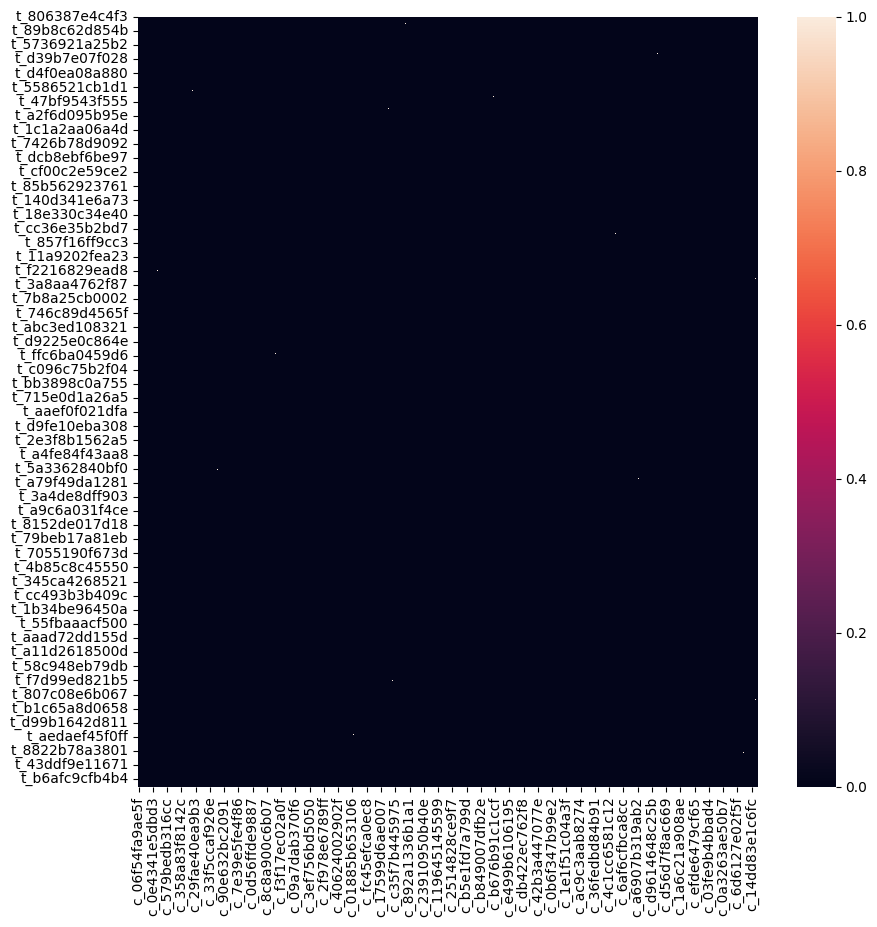

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def obtain_correlation_frame(topics_list, contents_list):
    arr = np.zeros(shape = (len(topics_list), len(contents_list)))
    cor_frame = pd.DataFrame(data = arr, index = list(topics_list), columns = list(contents_list))
    for topic_id, content_ids in data.correlations.loc[\
        list(set(topics_list).intersection(set(data.correlations.index)))\
    ].iterrows(): # restrict to the list of our contents
        for content_id in content_ids["content_ids"].split():
            if content_id in contents_list:
                cor_frame.loc[topic_id, content_id] = 1
    return cor_frame

lcontents = obtain_learnable_contents(data.channel_components[0])
ltopics = obtain_learnable_topics(data.channel_components[0])
sample_size = 3000
lcontents_sample = lcontents[list(np.random.choice(len(lcontents), sample_size, replace=False))]
ltopics_sample = ltopics[list(np.random.choice(len(ltopics), sample_size, replace=False))]
display(lcontents_sample)
display(ltopics_sample)
cframe = obtain_correlation_frame(ltopics_sample, lcontents_sample)

correlates = cframe.to_numpy().sum()
print("Cor: ",correlates, "Ratio: ", (correlates + 0.0) / (sample_size * sample_size))
plt.figure(figsize = (10, 10))
sns.heatmap(data = cframe)
plt.show()
display()

In [41]:
display(lcontents[[3,4,6]])
display(lcontents)

Index(['c_af05b751efdf', 'c_d95c204965eb', 'c_e7422d30f9de'], dtype='object', name='id')

Index(['c_e1d73acfff8e', 'c_433f60c8c551', 'c_bd6cb0b2064a', 'c_af05b751efdf',
       'c_d95c204965eb', 'c_82fff6f5f011', 'c_e7422d30f9de', 'c_5aee85b81df4',
       'c_ee5fdde42578', 'c_6287bfd9a353',
       ...
       'c_bc0c2f38405e', 'c_d1f6e1a4fdeb', 'c_d6152aa64456', 'c_d9f883585fae',
       'c_f281dc119ead', 'c_06e435c5adc4', 'c_1d988f48dbd1', 'c_9535009492ec',
       'c_d4456fa82c93', 'c_a3764558c917'],
      dtype='object', name='id', length=80172)

In [32]:
obtain_learnable_contents(data.channel_components[0])[0:500]

Index(['c_e1d73acfff8e', 'c_433f60c8c551', 'c_bd6cb0b2064a', 'c_af05b751efdf',
       'c_d95c204965eb', 'c_82fff6f5f011', 'c_e7422d30f9de', 'c_5aee85b81df4',
       'c_ee5fdde42578', 'c_6287bfd9a353',
       ...
       'c_baccfcfe5109', 'c_52866f8e97c1', 'c_8c1240803aa6', 'c_a3a512328392',
       'c_ed8aa6da7598', 'c_240168df3138', 'c_971bdc6d3416', 'c_af349bd72922',
       'c_1f15c4bf2208', 'c_5502faceb34f'],
      dtype='object', name='id', length=500)

In [8]:
display(data.contents)
display(data.topics)

,title,description,kind,text,language,copyright_holder,license,title_translate,description_translate
id,,,,,,,,,
c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN,"Add multi-digit numbers: 48,029+233,930","Add 48,029+233,930 using the standard algorith..."
c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN,Finding factors of a number,Sal finds the factors of 120.\n\n
c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN,Add demand curves,How to add demand curves\n\n
c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND,Approach node,In this video you will learn the approach swim...
c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf
...,...,...,...,...,...,...,...,...,...
c_fffcbdd4de8b,2. 12: Diffusion,NaN,html5,What will eventually happen to these dyes?\n\n...,en,CSU and Merlot,CC BY-NC-SA,2. 12: Diffusion,NaN
c_fffe15a2d069,Sommare facendo gruppi da 10,Sal somma 5+68 spezzando il 5 in un 2 e un 3.\n\n,video,NaN,it,NaN,NaN,Summarizing by making groups of 10,Sal sum 5+68 by breaking the 5 in a 2 and a 3....
c_fffed7b0d13a,Introdução à subtração,Sal fala sobre o que significa subtrair. Os ex...,video,NaN,pt,NaN,NaN,Introduction to subtraction,Sal talks about what it means to subtract. The...


,title,description,channel,category,level,language,parent,has_content,title_translate,description_translate
id,,,,,,,,,,
t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,NaN,NaN
t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False,Unit 3.3 Enlargements and Similarities,NaN
t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True,Inputs and outputs of a function,Understand a little more about functions.
t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True,Transcripts,NaN
t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
t_fffb0bf2801d,4.3 Graph of functions,NaN,e77b55,aligned,4,en,t_676e6a1a4dc7,False,4.3 Graph of functions,NaN
t_fffbe1d5d43c,Inscribed shapes problem solving,Use properties of inscribed angles to prove pr...,0c929f,source,4,sw,t_50145b9bab3f,True,NaN,NaN
t_fffe14f1be1e,Lección 7,NaN,6e90a7,aligned,6,es,t_d448c707984d,True,Lesson 7,NaN


In [19]:
def transform(x):
    return pd.Series(name = x.name, data = [data_vectorizer.vectorize(x["title_translate"]), data_vectorizer.vectorize(x["description_translate"])], index = ["title_translate", "description_translate"])

def obtain_topics_vector(topics_list):
    data.topics.loc[topics_list][["title_translate", "description_translate"]].apply(transform, axis = 1)

def obtain_contents_vector(contents_list):
    display(data.contents.loc[contents_list][["title_translate", "description_translate"]].apply(transform, axis = 1))

obtain_contents_vector(lcontents_sample)

,title_translate,description_translate
id,,
c_06f54fa9ae5f,"[313, 565]","[0, 16, 258, 313, 650]"
c_535f7bc38881,"[79, 392]",[]
c_4eb24ef38130,"[1, 50, 567, 621]","[1, 50, 567, 621]"
c_97b9a0d54136,"[826, 2609]",[]
c_eeca29203318,[],"[69, 119, 169, 212, 318, 342, 401, 542, 655, 7..."
...,...,...
c_87e804c36bf2,[22],[339]
c_a1933f19328f,"[284, 335, 591]","[53, 91, 157, 195, 284, 335, 405, 488, 720, 960]"
c_3c1a6c16abac,[576],[]


In [34]:
for x in range(1,5):
    print(x)

1
2
3
4


In [3]:
data_vectorizer.random_test_contents_sample(500)

Index(['c_f2c45473f497', 'c_28a9b09bf189', 'c_847de1b2d35b', 'c_201db9867384',
       'c_d9c783ef26d2', 'c_c43c5f449952', 'c_f35837316abc', 'c_75a726681a9f',
       'c_37dcd3909767', 'c_a0783bfd5f34',
       ...
       'c_cb0dd2f7ac49', 'c_9d4b6903567c', 'c_27cc820e785f', 'c_86ab38f8f1b8',
       'c_7a71e9dbf1c7', 'c_ff2453ee5181', 'c_2d4aab6be6a7', 'c_98fd36694aa3',
       'c_f7f71939ecf4', 'c_ed58402dfa58'],
      dtype='object', name='id', length=500)

In [4]:
data_vectorizer.obtain_correlation_frame(data_vectorizer.random_test_topics_sample(500), data_vectorizer.random_test_contents_sample(500)).sum().s

,c_64a0fd3ea7cb,c_a449cdba53d1,c_7d6b8b3b77e0,c_c3acd4bd9393,c_508567579854,c_07f06c0f5f95,c_4704bf9a36d5,c_63b49af3061b,c_58e4b13049f6,c_a38c932416a8,...,c_c833405fb348,c_705407395cad,c_f56ab4250f93,c_39c59e7f7666,c_45a81d00e185,c_b114ae59ac96,c_87494b29f3f0,c_3b148ef4594f,c_0bca6978a493,c_95a1835cb2e2
t_5971829c0edf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t_b2348ae3c8bd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t_48a85099ba48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t_5ec4039ccfd8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t_57a564f12465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t_3c9cd0092c86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t_762287db402d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t_4c3218b0ea34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t_ca0c1e23787b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
